In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
gme = yf.Ticker("GME")

In [7]:
gme_data = gme.history(period="max")

In [8]:
gme_data.reset_index(inplace=True)

In [9]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [11]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [12]:
soup = BeautifulSoup(data, 'html.parser')

In [13]:
soup.find_all("tbody")[1]

<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>
</tr>
<tr>
<td style="text-align:center">2018-04-30</td>
<td style="text-align:center">$1,786</td>
</tr>
<tr>
<td style="text-align:center">2018-01-31</td>
<td style="text-align:center">$2,825</td>
</tr>
<t

In [14]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

In [15]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$', "", regex=True)

In [17]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [18]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

def make_graph(stock_data, revenue_data, stock):
    # Ensure Date columns are datetime
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])
    
    # Filter data up to the specific dates
    filtered_stock_data = stock_data[stock_data["Date"] <= "2021-06-14"]
    filtered_revenue_data = revenue_data[revenue_data["Date"] <= "2021-04-30"]
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=1, 
        shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing=0.3
    )
    
    # Add traces for stock price and revenue
    fig.add_trace(
        go.Scatter(
            x=filtered_stock_data["Date"], 
            y=filtered_stock_data["Close"].astype("float"), 
            name="Share Price"
        ), 
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(
            x=filtered_revenue_data["Date"], 
            y=filtered_revenue_data["Revenue"].astype("float"), 
            name="Revenue"
        ), 
        row=2, col=1
    )
    
    # Update axes titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update layout
    fig.update_layout(
        showlegend=False,
        height=900,
        title={"text": stock, "x": 0.5},
        xaxis_rangeslider_visible=True
    )
    
    # Show the figure
    fig.show()

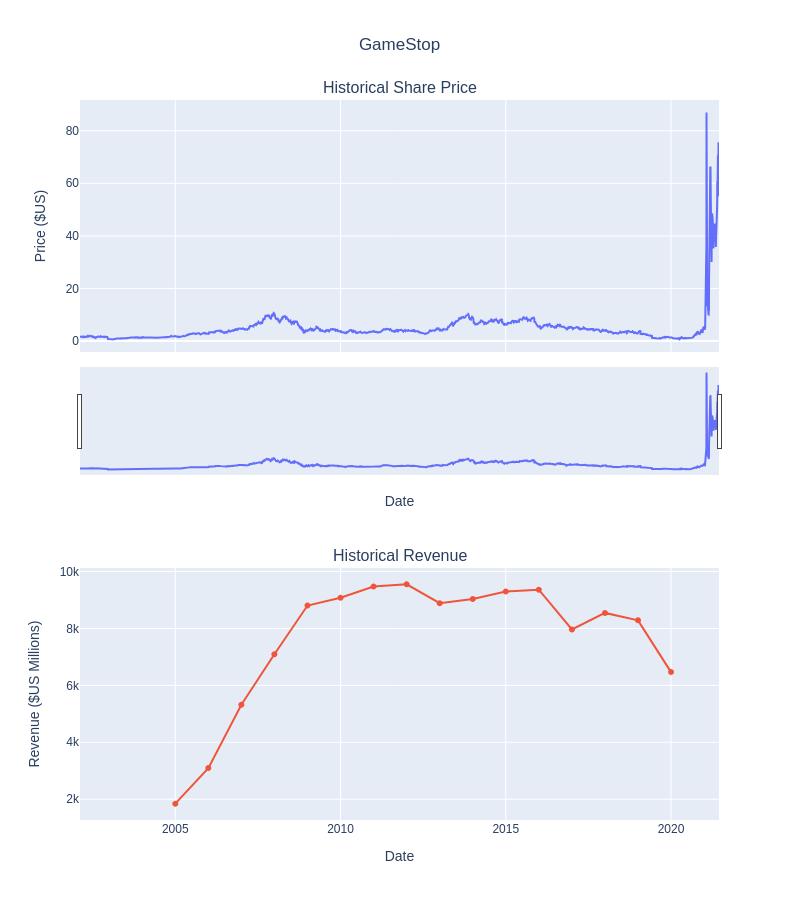

In [25]:
make_graph(gme_data, gme_revenue, 'GameStop')